# Data Understanding

## Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from IPython.display import Image
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix


## Data Loading

In [ ]:
# Load dataset from github repository
url = 'https://raw.githubusercontent.com/eru2024/laskariai-capstone/refs/heads/main/datasets/heart_disease_health_indicators_BRFSS2015.csv'
heart = pd.read_csv(url)
heart.head(3)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0


## Dataset Structure

In [ ]:
# Custom function for summarize dataset structure
def get_dataframe_summary(dfs):
  summary_data = []

  for df_name, df in dfs.items():
    if not isinstance(df, pd.DataFrame):
      print(f"Warning: {df_name} is not a pandas DataFrame. Skipping.")
      continue

    for col_name in df.columns:
      summary_data.append({
          'DataFrame Name': df_name,
          'Column Name': col_name,
          'dtype': df[col_name].dtype,
          'Minimum Value': df[col_name].min() if pd.api.types.is_numeric_dtype(df[col_name]) else np.nan,
          'Maximum Value': df[col_name].max() if pd.api.types.is_numeric_dtype(df[col_name]) else np.nan,
          'Mean Value': df[col_name].mean() if pd.api.types.is_numeric_dtype(df[col_name]) else np.nan,
          'Median Value': df[col_name].median() if pd.api.types.is_numeric_dtype(df[col_name]) else np.nan,
          'Standard Deviation': df[col_name].std() if pd.api.types.is_numeric_dtype(df[col_name]) else np.nan,
          'Number of Rows': len(df),
          'Number of Missing Values': df[col_name].isnull().sum(),
          'Number of Unique Values': df[col_name].nunique(),
          'Number of Duplicated Values': df.duplicated(subset=[col_name]).sum()
      })

  return pd.DataFrame(summary_data)

In [ ]:
# Apply function on avalaible dataframes
dataframes = {'heart': heart}

summary_dataset = get_dataframe_summary(dataframes)
summary_dataset

,DataFrame Name,Column Name,dtype,Minimum Value,Maximum Value,Mean Value,Median Value,Standard Deviation,Number of Rows,Number of Missing Values,Number of Unique Values,Number of Duplicated Values
0,heart,HeartDiseaseorAttack,float64,0.0,1.0,0.094186,0.0,0.292087,253680,0,2,253678
1,heart,HighBP,float64,0.0,1.0,0.429001,0.0,0.494934,253680,0,2,253678
2,heart,HighChol,float64,0.0,1.0,0.424121,0.0,0.494210,253680,0,2,253678
3,heart,CholCheck,float64,0.0,1.0,0.962670,1.0,0.189571,253680,0,2,253678
4,heart,BMI,float64,12.0,98.0,28.382364,27.0,6.608694,253680,0,84,253596
5,heart,Smoker,float64,0.0,1.0,0.443169,0.0,0.496761,253680,0,2,253678
6,heart,Stroke,float64,0.0,1.0,0.040571,0.0,0.197294,253680,0,2,253678
7,heart,Diabetes,float64,0.0,2.0,0.296921,0.0,0.698160,253680,0,3,253677
8,heart,PhysActivity,float64,0.0,1.0,0.756544,1.0,0.429169,253680,0,2,253678
9,heart,Fruits,float64,0.0,1.0,0.634256,1.0,0.481639,253680,0,2,253678


## Variable Description

### 1. HeartDiseaseorAttack
- **Risk Factor:** Ever Diagnosed with Heart Attack  
- **Prologue:** Has a doctor, nurse, or other health professional ever told you that you had any of the following? For each, tell me “Yes”, “No”, or you’re “Not sure”  
- **Description:** (Ever told) you had a heart attack, also called a myocardial infarction?

### 2. Angina or Coronary Heart Disease
- **Risk Factor:** Ever Diagnosed with Angina or Coronary Heart Disease  
- **Prologue:** Has a doctor, nurse, or other health professional ever told you that you had any of the following? For each, tell me “Yes”, “No”, or you’re “Not sure”  
- **Description:** (Ever told) you had angina or coronary heart disease?

### 3. HighBP
- **Risk Factor:** Ever Told Blood Pressure High  
- **Description:** Have you EVER been told by a doctor, nurse or other health professional that you have high blood pressure? (If "Yes" and the respondent is female, ask "Was this only when you were pregnant?")

### 4. CholCheck
- **Risk Factor:** Ever Had Blood Cholesterol Checked  
- **Description:** Blood cholesterol is a fatty substance found in the blood. Have you EVER had your blood cholesterol checked?

### 5. BMI
- **Description:** Body Mass Index = Body weight in kilogram / (Body height in meter)^2

### 6. Smoker
- **Risk Factor:** Current Smoking Calculated Variable  
- **Description:** Adults who are current smokers

### 7. Stroke
- **Risk Factor:** Ever Diagnosed with a Stroke  
- **Description:** (Ever told) you had a stroke.

### 8. Diabetes
- **Risk Factor:** (Ever told) you have diabetes  
- **Description:** (Ever told) you have diabetes (If "Yes" and the respondent is female, ask "Was this only when you were pregnant?". If respondent says pre-diabetes or borderline diabetes, use response code 4.)

### 9. PhysActivity
- **Risk Factor:** Exercise in Past 30 Days  
- **Description:** During the past month, other than your regular job, did you participate in any physical activities or exercises such as running, calisthenics, golf, gardening, or walking for exercise?

### 10. Fruits
- **Risk Factor:** How many times did you eat fruit?  
- **Description:** During the past month, not counting juice, how many times per day, week, or month did you eat fruit? Count fresh, frozen, or canned fruit. Include apples, bananas, applesauce, oranges, grape fruit, fruit salad, watermelon, cantaloupe or musk melon, papaya, lychees, star fruit.

### 11. Veggies (Dark Green)
- **Risk Factor:** How many times did you eat dark green vegetables?  
- **Description:** During the past month, how many times per day, week, or month did you eat dark green vegetables like broccoli or dark leafy greens including romaine, chard, collard greens or spinach?

### 12. Veggies (Orange-Colored)
- **Risk Factor:** How many times did you eat orange-colored vegetables?  
- **Description:** During the past month, how many times per day, week, or month did you eat orange-colored vegetables such as sweet potatoes, pumpkin, winter squash, or carrots?

### 13. Veggies (Other)
- **Risk Factor:** How many times did you eat OTHER vegetables?  
- **Description:** Not counting what you just told me about, during the past month, how many times per day, week, or month did you eat OTHER vegetables like tomatoes, tomato juice or V-8 juice, corn, eggplant, peas, lettuce, cabbage, and white potatoes that are not fried?

### 14. HvyAlcoholConsump
- **Risk Factor:** Heavy Alcohol Consumption  
- **Description:** Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)

### 15. AnyHealthcare
- **Risk Factor:** Have any health care coverage  
- **Description:** Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service?

### 16. NoDocbcCost
- **Risk Factor:** Could Not See Doctor Because of Cost  
- **Description:** Was there a time in the past 12 months when you needed to see a doctor but could not because of cost?

### 17. GenHlth
- **Risk Factor:** General Health  
- **Description:** Would you say that in general your health is:  
  1: Excellent  
  2: Very good  
  3: Good  
  4: Fair  
  5: Poor

### 18. MentHlth
- **Risk Factor:** Number of Days Mental Health Not Good
- **Description:** Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many
days during the past 30 days was your mental health not good?

### 19. PhysHlth
- **Risk Factor:** Number of Days Physical Health Not Good
- **Description:** Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?

### 20. DiffWalk
- **Risk Factor:** Difficulty Walking or Climbing Stairs  
- **Description:** Do you have serious difficulty walking or climbing stairs?

### 21. Sex
- **Risk Factor:** Respondent’s Sex  
- **Description:** Indicate sex of respondent. (0: male, 1: female)

### 22. Age
- **Risk Factor:** Respondent’s Age  
- **Description:**  
  1: 18-24 years  
  2: 25-29 years  
  3: 30-34 years  
  4: 35-39 years  
  5: 40-44 years  
  6: 45-49 years  
  7: 50-54 years  
  8: 55-59 years  
  9: 60-64 years  
  10: 65-69 years  
  11: 70-74 years  
  12: 75-79 years  
  13: 80-84 years

### 23. Education
- **Risk Factor:** Education Level  
- **Description:** What is the highest grade or year of school you completed?  
  1: Never attended school or only kindergarten  
  2: Grades 1 through 8 (Elementary)  
  3: Grades 9 through 11 (Some high school)  
  4: Grade 12 or GED (High school graduate)  
  5: College 1 year to 3 years (Some college or technical school)  
  6: College 4 years or more (College graduate)

### 24. Income
- **Risk Factor:** Income Level  
- **Description:** Is your annual household income from all sources:  
  1: Less than $10,000  
  2: Less than $15,000 ($10,000 to less than $15,000)  
  3: Less than $20,000 ($15,000 to less than $20,000)  
  4: Less than $25,000 ($20,000 to less than $25,000)  
  5: Less than $35,000 ($25,000 to less than $35,000)  
  6: Less than $50,000 ($35,000 to less than $50,000)  
  7: Less than $75,000 ($50,000 to less than $75,000)  
  8: $75,000 or more

## EDA

In [ ]:
# prompt: copy heart as heart_prep but exclude Income, PhysHlth, MentHlth, Stroke

heart_prep = heart.drop(columns=['Income', 'Stroke'])

In [ ]:
# prompt: change data type columns from heart_prep except BMI as integer

# Identify columns to convert (all except 'BMI')
cols_to_convert = [col for col in heart_prep.columns if col != 'BMI']

# Convert the data types of the selected columns to integer
heart_prep[cols_to_convert] = heart_prep[cols_to_convert].astype(int)

# Display the data types after conversion to verify
heart_prep.dtypes


,0
HeartDiseaseorAttack,int64
HighBP,int64
HighChol,int64
CholCheck,int64
BMI,float64
Smoker,int64
Diabetes,int64
PhysActivity,int64
Fruits,int64
Veggies,int64


In [ ]:
# Show all columns
pd.set_option('display.max_columns', None)

# Show all rows (if needed)
pd.set_option('display.max_rows', None)

# (Optional) Increase column width
pd.set_option('display.max_colwidth', None)

In [ ]:
print(heart_prep.corr())

                      HeartDiseaseorAttack    HighBP  HighChol  CholCheck  \
HeartDiseaseorAttack              1.000000  0.209361  0.180765   0.044206   
HighBP                            0.209361  1.000000  0.298199   0.098508   
HighChol                          0.180765  0.298199  1.000000   0.085642   
CholCheck                         0.044206  0.098508  0.085642   1.000000   
BMI                               0.052904  0.213748  0.106722   0.034495   
Smoker                            0.114441  0.096991  0.091299  -0.009929   
Diabetes                          0.180272  0.271596  0.209085   0.067546   
PhysActivity                     -0.087299 -0.125267 -0.078046   0.004190   
Fruits                           -0.019790 -0.040555 -0.040859   0.023849   
Veggies                          -0.039167 -0.061266 -0.039874   0.006121   
HvyAlcoholConsump                -0.028991 -0.003972 -0.011543  -0.023730   
AnyHealthcare                     0.018734  0.038425  0.042230   0.117626   

**Top 5 features with high correlation with HeartDiseaseorAttack**: `GenHlth`, `HighBP`, `DiffWalk`, `Age`, `Diabetes`

**Potential Redundant**: `GenHlth`, `PhysHlth`, `DiffWalk`, `MentHlth`

In [ ]:
# prompt: show dataframe of features with correlation with HeartDiseaseorAttack from heart_prep and sort from largest to smallest

# Calculate correlations
correlations = heart_prep.corr()['HeartDiseaseorAttack'].drop('HeartDiseaseorAttack')

# Create a DataFrame from correlations
correlations_df = correlations.reset_index()
correlations_df.columns = ['Feature', 'Correlation']

# Sort the DataFrame by absolute correlation value in descending order
correlations_df['Absolute_Correlation'] = correlations_df['Correlation'].abs()
sorted_correlations_df = correlations_df.sort_values(by='Absolute_Correlation', ascending=False).drop(columns='Absolute_Correlation')

# Display the sorted DataFrame
sorted_correlations_df

,Feature,Correlation
12,GenHlth,0.258383
17,Age,0.221618
15,DiffWalk,0.212709
0,HighBP,0.209361
14,PhysHlth,0.181698
1,HighChol,0.180765
5,Diabetes,0.180272
4,Smoker,0.114441
18,Education,-0.099600
6,PhysActivity,-0.087299


## Data Preparation

In [ ]:
from sklearn.naive_bayes import GaussianNB
from imblearn.combine import SMOTEENN # SMOTEENN is a good combination of SMOTE and Edited Nearest Neighbours (ENN)

# Define features (X) and target variable (y)
features = heart_prep.drop('HeartDiseaseorAttack', axis=1)
target = heart_prep['HeartDiseaseorAttack']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Apply SMOTE and Undersampling to training data
# SMOTEENN performs both over-sampling and under-sampling in one step.
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

# New Section

# Model Development

## All Features

In [ ]:
lr = LogisticRegression(random_state=0).fit(X_train_resampled, y_train_resampled)
dt = DecisionTreeClassifier(random_state=0).fit(X_train_resampled, y_train_resampled)
rf = RandomForestClassifier(random_state=0).fit(X_train_resampled, y_train_resampled)
knn = KNeighborsClassifier().fit(X_train_resampled, y_train_resampled)
# svm = SVC(random_state=0).fit(X_train_resampled, y_train_resampled)
nb = GaussianNB().fit(X_train_resampled, y_train_resampled)

print("Model selesai dilatih.")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model selesai dilatih.


In [ ]:
# definisikan fungsi untuk mengevaluasi dan mengembalikan hasil sebagai dictionary
def evaluate_model(model, X_test, y_test):
  y_pred = model.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  results = {
    'Confusion Matrix': cm,
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-Score': f1_score(y_test, y_pred)
  }
  return results

# evaluasi setiap model dan mengumpulkan hasilnya
evaluasi_model = {
  'Logistic Regression (lr)': evaluate_model(lr, X_test, y_test),
  'Decision Tree (dt)': evaluate_model(dt, X_test, y_test),
  'Random Forest (rf)': evaluate_model(rf, X_test, y_test),
  'K-Nearest Neighbors (knn)': evaluate_model(knn, X_test, y_test),
  # 'Support Vector Machine (svm)': evaluate_model(svm, X_test, y_test),
  'Naive Bayes (nb)': evaluate_model(nb, X_test, y_test),
}

# definisikan DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# isi DataFrame dengan hasil
rows = []
for model_name, metrics in evaluasi_model.items():
  rows.append({
    'Model': model_name,
    'Accuracy': metrics['Accuracy'],
    'Precision': metrics['Precision'],
    'Recall': metrics['Recall'],
    'F1-Score': metrics['F1-Score']
  })

# konversikan dictionary ke DataFrame
summary_df = pd.DataFrame(rows)

# tampilkan DataFrame
print("Evaluasi model klasifikasi:\n")
print(summary_df)

Evaluasi model klasifikasi:

                       Model  Accuracy  Precision    Recall  F1-Score
0   Logistic Regression (lr)  0.643429   0.190724  0.861577  0.312312
1         Decision Tree (dt)  0.729975   0.196232  0.605076  0.296353
2         Random Forest (rf)  0.735020   0.221530  0.723784  0.339231
3  K-Nearest Neighbors (knn)  0.718247   0.202002  0.677223  0.311184
4           Naive Bayes (nb)  0.657048   0.185427  0.780831  0.299686


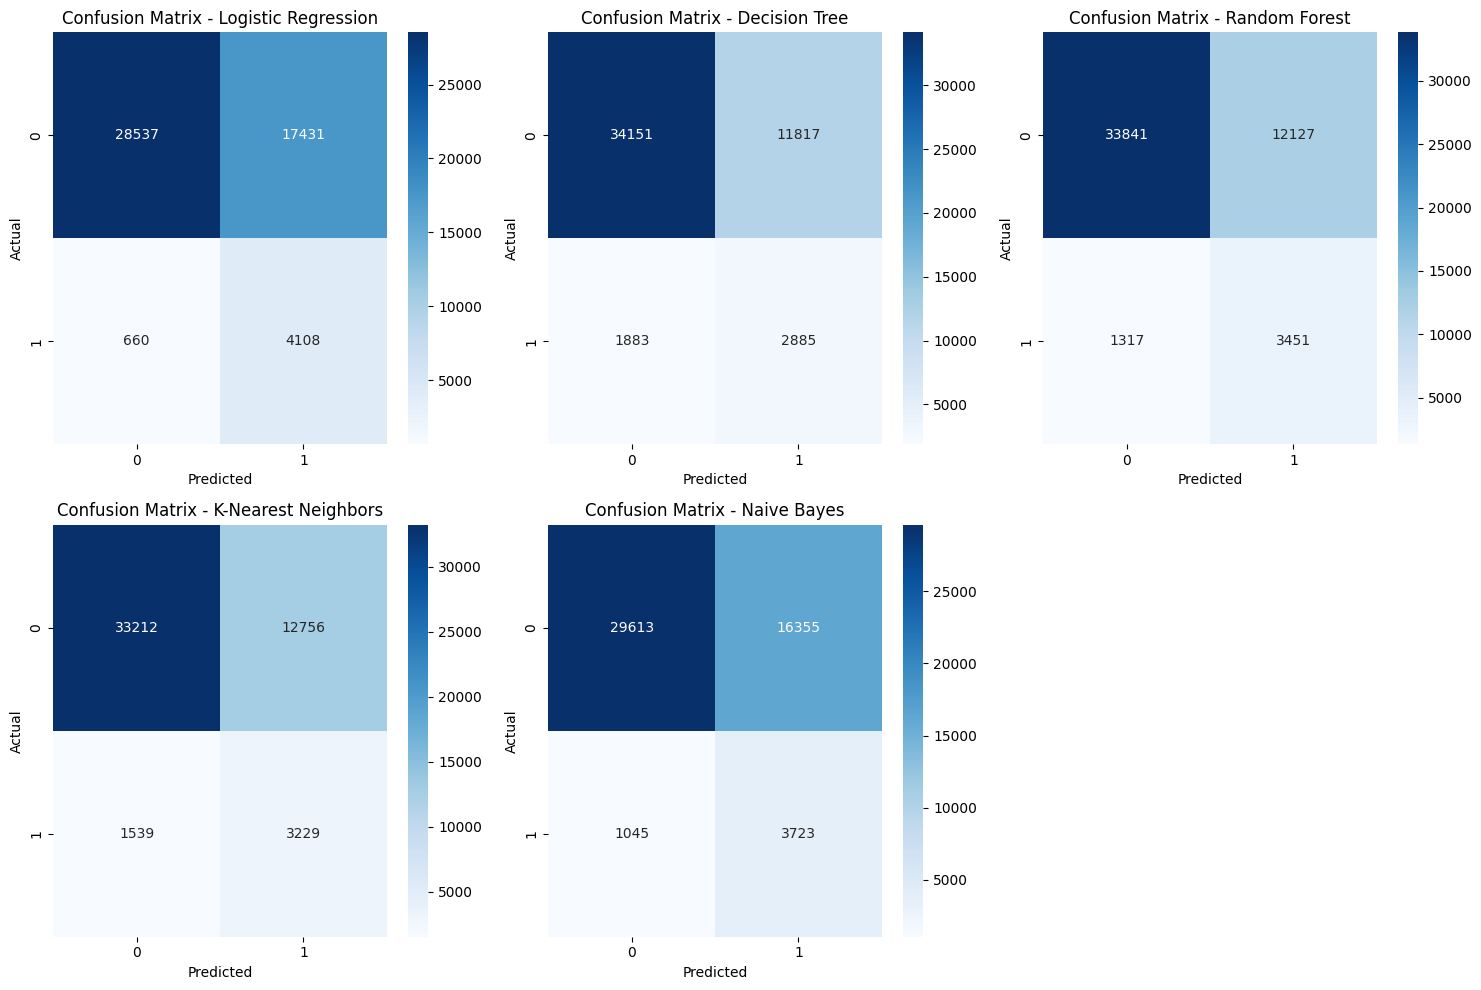

In [ ]:
# prompt: generate correlation matrix heatmaps on all model

# Generate correlation matrices for each model's predictions
models = {
    'Logistic Regression': lr,
    'Decision Tree': dt,
    'Random Forest': rf,
    'K-Nearest Neighbors': knn,
    # 'Support Vector Machine': svm,
    'Naive Bayes': nb
}

plt.figure(figsize=(15, 10))

for i, (model_name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.subplot(2, 3, i + 1) # Create subplots for each heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()

## Feature Set 1



In [ ]:
X_train_set1 = X_train_resampled.drop(columns=['MentHlth'])
X_test_set1 = X_test.drop(columns=['MentHlth'])

In [ ]:
lr = LogisticRegression(random_state=0).fit(X_train_set1, y_train_resampled)
dt = DecisionTreeClassifier(random_state=0).fit(X_train_set1, y_train_resampled)
rf = RandomForestClassifier(random_state=0).fit(X_train_set1, y_train_resampled)
knn = KNeighborsClassifier().fit(X_train_set1, y_train_resampled)
# svm = SVC(random_state=0).fit(X_train_resampled, y_train_resampled)
nb = GaussianNB().fit(X_train_set1, y_train_resampled)

print("Model selesai dilatih.")

# definisikan fungsi untuk mengevaluasi dan mengembalikan hasil sebagai dictionary
def evaluate_model(model, X_test, y_test):
  y_pred = model.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  results = {
    'Confusion Matrix': cm,
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-Score': f1_score(y_test, y_pred)
  }
  return results

# evaluasi setiap model dan mengumpulkan hasilnya
evaluasi_model = {
  'Logistic Regression (lr)': evaluate_model(lr, X_test_set1, y_test),
  'Decision Tree (dt)': evaluate_model(dt, X_test_set1, y_test),
  'Random Forest (rf)': evaluate_model(rf, X_test_set1, y_test),
  'K-Nearest Neighbors (knn)': evaluate_model(knn, X_test_set1, y_test),
  # 'Support Vector Machine (svm)': evaluate_model(svm, X_test, y_test),
  'Naive Bayes (nb)': evaluate_model(nb, X_test_set1, y_test),
}

# definisikan DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# isi DataFrame dengan hasil
rows = []
for model_name, metrics in evaluasi_model.items():
  rows.append({
    'Model': model_name,
    'Accuracy': metrics['Accuracy'],
    'Precision': metrics['Precision'],
    'Recall': metrics['Recall'],
    'F1-Score': metrics['F1-Score']
  })

# konversikan dictionary ke DataFrame
summary_df = pd.DataFrame(rows)

# tampilkan DataFrame
print("Evaluasi model klasifikasi:\n")
print(summary_df)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model selesai dilatih.
Evaluasi model klasifikasi:

                       Model  Accuracy  Precision    Recall  F1-Score
0   Logistic Regression (lr)  0.642148   0.190179  0.861787  0.311595
1         Decision Tree (dt)  0.731552   0.198748  0.612416  0.300103
2         Random Forest (rf)  0.728240   0.216851  0.724413  0.333784
3  K-Nearest Neighbors (knn)  0.722347   0.206192  0.685822  0.317060
4           Naive Bayes (nb)  0.647962   0.184034  0.799706  0.299211


## Feature Set 2

In [ ]:
X_train_set2 = X_train_resampled.drop(columns=['MentHlth', 'PhysHlth'])
X_test_set2 = X_test.drop(columns=['MentHlth', 'PhysHlth'])

lr = LogisticRegression(random_state=0).fit(X_train_set2, y_train_resampled)
dt = DecisionTreeClassifier(random_state=0).fit(X_train_set2, y_train_resampled)
rf = RandomForestClassifier(random_state=0).fit(X_train_set2, y_train_resampled)
knn = KNeighborsClassifier().fit(X_train_set2, y_train_resampled)
# svm = SVC(random_state=0).fit(X_train_resampled, y_train_resampled)
nb = GaussianNB().fit(X_train_set2, y_train_resampled)

print("Model selesai dilatih.")

# definisikan fungsi untuk mengevaluasi dan mengembalikan hasil sebagai dictionary
def evaluate_model(model, X_test, y_test):
  y_pred = model.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  results = {
    'Confusion Matrix': cm,
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-Score': f1_score(y_test, y_pred)
  }
  return results

# evaluasi setiap model dan mengumpulkan hasilnya
evaluasi_model = {
  'Logistic Regression (lr)': evaluate_model(lr, X_test_set2, y_test),
  'Decision Tree (dt)': evaluate_model(dt, X_test_set2, y_test),
  'Random Forest (rf)': evaluate_model(rf, X_test_set2, y_test),
  'K-Nearest Neighbors (knn)': evaluate_model(knn, X_test_set2, y_test),
  # 'Support Vector Machine (svm)': evaluate_model(svm, X_test, y_test),
  'Naive Bayes (nb)': evaluate_model(nb, X_test_set2, y_test),
}

# definisikan DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# isi DataFrame dengan hasil
rows = []
for model_name, metrics in evaluasi_model.items():
  rows.append({
    'Model': model_name,
    'Accuracy': metrics['Accuracy'],
    'Precision': metrics['Precision'],
    'Recall': metrics['Recall'],
    'F1-Score': metrics['F1-Score']
  })

# konversikan dictionary ke DataFrame
summary_df = pd.DataFrame(rows)

# tampilkan DataFrame
print("Evaluasi model klasifikasi:\n")
print(summary_df)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model selesai dilatih.
Evaluasi model klasifikasi:

                       Model  Accuracy  Precision    Recall  F1-Score
0   Logistic Regression (lr)  0.638935   0.189297  0.865772  0.310668
1         Decision Tree (dt)  0.731611   0.199606  0.616611  0.301585
2         Random Forest (rf)  0.720337   0.212230  0.728607  0.328713
3  K-Nearest Neighbors (knn)  0.732892   0.210862  0.671770  0.320974
4           Naive Bayes (nb)  0.617569   0.176632  0.838297  0.291784


## Feature Set 3

In [ ]:
X_train_set2 = X_train_resampled.drop(columns=['MentHlth', 'PhysHlth', 'DiffWalk'])
X_test_set2 = X_test.drop(columns=['MentHlth', 'PhysHlth', 'DiffWalk'])

lr = LogisticRegression(random_state=0).fit(X_train_set2, y_train_resampled)
dt = DecisionTreeClassifier(random_state=0).fit(X_train_set2, y_train_resampled)
rf = RandomForestClassifier(random_state=0).fit(X_train_set2, y_train_resampled)
knn = KNeighborsClassifier().fit(X_train_set2, y_train_resampled)
# svm = SVC(random_state=0).fit(X_train_resampled, y_train_resampled)
nb = GaussianNB().fit(X_train_set2, y_train_resampled)

print("Model selesai dilatih.")

# definisikan fungsi untuk mengevaluasi dan mengembalikan hasil sebagai dictionary
def evaluate_model(model, X_test, y_test):
  y_pred = model.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  results = {
    'Confusion Matrix': cm,
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-Score': f1_score(y_test, y_pred)
  }
  return results

# evaluasi setiap model dan mengumpulkan hasilnya
evaluasi_model = {
  'Logistic Regression (lr)': evaluate_model(lr, X_test_set2, y_test),
  'Decision Tree (dt)': evaluate_model(dt, X_test_set2, y_test),
  'Random Forest (rf)': evaluate_model(rf, X_test_set2, y_test),
  'K-Nearest Neighbors (knn)': evaluate_model(knn, X_test_set2, y_test),
  # 'Support Vector Machine (svm)': evaluate_model(svm, X_test, y_test),
  'Naive Bayes (nb)': evaluate_model(nb, X_test_set2, y_test),
}

# definisikan DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# isi DataFrame dengan hasil
rows = []
for model_name, metrics in evaluasi_model.items():
  rows.append({
    'Model': model_name,
    'Accuracy': metrics['Accuracy'],
    'Precision': metrics['Precision'],
    'Recall': metrics['Recall'],
    'F1-Score': metrics['F1-Score']
  })

# konversikan dictionary ke DataFrame
summary_df = pd.DataFrame(rows)

# tampilkan DataFrame
print("Evaluasi model klasifikasi:\n")
print(summary_df)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model selesai dilatih.
Evaluasi model klasifikasi:

                       Model  Accuracy  Precision    Recall  F1-Score
0   Logistic Regression (lr)  0.639231   0.189113  0.863465  0.310272
1         Decision Tree (dt)  0.734232   0.202200  0.620596  0.305020
2         Random Forest (rf)  0.719864   0.210080  0.717701  0.325023
3  K-Nearest Neighbors (knn)  0.732813   0.207262  0.652475  0.314592
4           Naive Bayes (nb)  0.588281   0.167457  0.851300  0.279863


## Feature Set 4
`GenHlth`, `HighBP`, `DiffWalk`, `Age`, `Diabetes`, `HighChol`

In [ ]:
X_train_set2 = X_train_resampled[['GenHlth', 'HighBP', 'DiffWalk', 'Age', 'Diabetes', 'HighChol']]
X_test_set2 = X_test[['GenHlth', 'HighBP', 'DiffWalk', 'Age', 'Diabetes', 'HighChol']]

lr = LogisticRegression(random_state=0).fit(X_train_set2, y_train_resampled)
dt = DecisionTreeClassifier(random_state=0).fit(X_train_set2, y_train_resampled)
rf = RandomForestClassifier(random_state=0).fit(X_train_set2, y_train_resampled)
knn = KNeighborsClassifier().fit(X_train_set2, y_train_resampled)
# svm = SVC(random_state=0).fit(X_train_resampled, y_train_resampled)
nb = GaussianNB().fit(X_train_set2, y_train_resampled)

print("Model selesai dilatih.")

# definisikan fungsi untuk mengevaluasi dan mengembalikan hasil sebagai dictionary
def evaluate_model(model, X_test, y_test):
  y_pred = model.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  results = {
    'Confusion Matrix': cm,
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-Score': f1_score(y_test, y_pred)
  }
  return results

# evaluasi setiap model dan mengumpulkan hasilnya
evaluasi_model = {
  'Logistic Regression (lr)': evaluate_model(lr, X_test_set2, y_test),
  'Decision Tree (dt)': evaluate_model(dt, X_test_set2, y_test),
  'Random Forest (rf)': evaluate_model(rf, X_test_set2, y_test),
  'K-Nearest Neighbors (knn)': evaluate_model(knn, X_test_set2, y_test),
  # 'Support Vector Machine (svm)': evaluate_model(svm, X_test, y_test),
  'Naive Bayes (nb)': evaluate_model(nb, X_test_set2, y_test),
}

# definisikan DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# isi DataFrame dengan hasil
rows = []
for model_name, metrics in evaluasi_model.items():
  rows.append({
    'Model': model_name,
    'Accuracy': metrics['Accuracy'],
    'Precision': metrics['Precision'],
    'Recall': metrics['Recall'],
    'F1-Score': metrics['F1-Score']
  })

# konversikan dictionary ke DataFrame
summary_df = pd.DataFrame(rows)

# tampilkan DataFrame
print("Evaluasi model klasifikasi:\n")
print(summary_df)

Model selesai dilatih.
Evaluasi model klasifikasi:

                       Model  Accuracy  Precision    Recall  F1-Score
0   Logistic Regression (lr)  0.622497   0.185216  0.887584  0.306478
1         Decision Tree (dt)  0.614514   0.181826  0.886326  0.301749
2         Random Forest (rf)  0.614100   0.181662  0.886326  0.301523
3  K-Nearest Neighbors (knn)  0.900978   0.294872  0.038591  0.068249
4           Naive Bayes (nb)  0.676837   0.200155  0.813968  0.321301


## Feature Set 5

In [ ]:
X_train_set2 = X_train_resampled[['GenHlth', 'HighBP', 'Age', 'Diabetes', 'HighChol']]
X_test_set2 = X_test[['GenHlth', 'HighBP', 'Age', 'Diabetes', 'HighChol']]

lr = LogisticRegression(random_state=0).fit(X_train_set2, y_train_resampled)
dt = DecisionTreeClassifier(random_state=0).fit(X_train_set2, y_train_resampled)
rf = RandomForestClassifier(random_state=0).fit(X_train_set2, y_train_resampled)
knn = KNeighborsClassifier().fit(X_train_set2, y_train_resampled)
# svm = SVC(random_state=0).fit(X_train_resampled, y_train_resampled)
nb = GaussianNB().fit(X_train_set2, y_train_resampled)

print("Model selesai dilatih.")

# definisikan fungsi untuk mengevaluasi dan mengembalikan hasil sebagai dictionary
def evaluate_model(model, X_test, y_test):
  y_pred = model.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  results = {
    'Confusion Matrix': cm,
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-Score': f1_score(y_test, y_pred)
  }
  return results

# evaluasi setiap model dan mengumpulkan hasilnya
evaluasi_model = {
  'Logistic Regression (lr)': evaluate_model(lr, X_test_set2, y_test),
  'Decision Tree (dt)': evaluate_model(dt, X_test_set2, y_test),
  'Random Forest (rf)': evaluate_model(rf, X_test_set2, y_test),
  'K-Nearest Neighbors (knn)': evaluate_model(knn, X_test_set2, y_test),
  # 'Support Vector Machine (svm)': evaluate_model(svm, X_test, y_test),
  'Naive Bayes (nb)': evaluate_model(nb, X_test_set2, y_test),
}

# definisikan DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# isi DataFrame dengan hasil
rows = []
for model_name, metrics in evaluasi_model.items():
  rows.append({
    'Model': model_name,
    'Accuracy': metrics['Accuracy'],
    'Precision': metrics['Precision'],
    'Recall': metrics['Recall'],
    'F1-Score': metrics['F1-Score']
  })

# konversikan dictionary ke DataFrame
summary_df = pd.DataFrame(rows)

# tampilkan DataFrame
print("Evaluasi model klasifikasi:\n")
print(summary_df)

Model selesai dilatih.
Evaluasi model klasifikasi:

                       Model  Accuracy  Precision    Recall  F1-Score
0   Logistic Regression (lr)  0.615362   0.182273  0.887164  0.302413
1         Decision Tree (dt)  0.609646   0.180295  0.889262  0.299806
2         Random Forest (rf)  0.609646   0.180295  0.889262  0.299806
3  K-Nearest Neighbors (knn)  0.904585   0.376271  0.023280  0.043848
4           Naive Bayes (nb)  0.653481   0.192306  0.839765  0.312947


## Feature Set 6

In [ ]:
X_train_set2 = X_train_resampled[['GenHlth', 'HighBP', 'Age', 'Diabetes', 'HighChol', 'Smoker']]
X_test_set2 = X_test[['GenHlth', 'HighBP', 'Age', 'Diabetes', 'HighChol', 'Smoker']]

lr = LogisticRegression(random_state=0).fit(X_train_set2, y_train_resampled)
dt = DecisionTreeClassifier(random_state=0).fit(X_train_set2, y_train_resampled)
rf = RandomForestClassifier(random_state=0).fit(X_train_set2, y_train_resampled)
knn = KNeighborsClassifier().fit(X_train_set2, y_train_resampled)
# svm = SVC(random_state=0).fit(X_train_resampled, y_train_resampled)
nb = GaussianNB().fit(X_train_set2, y_train_resampled)

print("Model selesai dilatih.")

# definisikan fungsi untuk mengevaluasi dan mengembalikan hasil sebagai dictionary
def evaluate_model(model, X_test, y_test):
  y_pred = model.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  results = {
    'Confusion Matrix': cm,
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-Score': f1_score(y_test, y_pred)
  }
  return results

# evaluasi setiap model dan mengumpulkan hasilnya
evaluasi_model = {
  'Logistic Regression (lr)': evaluate_model(lr, X_test_set2, y_test),
  'Decision Tree (dt)': evaluate_model(dt, X_test_set2, y_test),
  'Random Forest (rf)': evaluate_model(rf, X_test_set2, y_test),
  'K-Nearest Neighbors (knn)': evaluate_model(knn, X_test_set2, y_test),
  # 'Support Vector Machine (svm)': evaluate_model(svm, X_test, y_test),
  'Naive Bayes (nb)': evaluate_model(nb, X_test_set2, y_test),
}

# definisikan DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# isi DataFrame dengan hasil
rows = []
for model_name, metrics in evaluasi_model.items():
  rows.append({
    'Model': model_name,
    'Accuracy': metrics['Accuracy'],
    'Precision': metrics['Precision'],
    'Recall': metrics['Recall'],
    'F1-Score': metrics['F1-Score']
  })

# konversikan dictionary ke DataFrame
summary_df = pd.DataFrame(rows)

# tampilkan DataFrame
print("Evaluasi model klasifikasi:\n")
print(summary_df)

Model selesai dilatih.
Evaluasi model klasifikasi:

                       Model  Accuracy  Precision    Recall  F1-Score
0   Logistic Regression (lr)  0.614160   0.182286  0.890940  0.302650
1         Decision Tree (dt)  0.618042   0.183567  0.888842  0.304290
2         Random Forest (rf)  0.617707   0.183431  0.888842  0.304104
3  K-Nearest Neighbors (knn)  0.901451   0.311075  0.040059  0.070977
4           Naive Bayes (nb)  0.655314   0.192783  0.837039  0.313388


## Feature Set 7

In [ ]:
X_train_set2 = X_train_resampled[['GenHlth', 'HighBP', 'Age', 'Diabetes', 'HighChol', 'Smoker', 'Education']]
X_test_set2 = X_test[['GenHlth', 'HighBP', 'Age', 'Diabetes', 'HighChol', 'Smoker', 'Education']]

lr = LogisticRegression(random_state=0).fit(X_train_set2, y_train_resampled)
dt = DecisionTreeClassifier(random_state=0).fit(X_train_set2, y_train_resampled)
rf = RandomForestClassifier(random_state=0).fit(X_train_set2, y_train_resampled)
knn = KNeighborsClassifier().fit(X_train_set2, y_train_resampled)
# svm = SVC(random_state=0).fit(X_train_resampled, y_train_resampled)
nb = GaussianNB().fit(X_train_set2, y_train_resampled)

print("Model selesai dilatih.")

# definisikan fungsi untuk mengevaluasi dan mengembalikan hasil sebagai dictionary
def evaluate_model(model, X_test, y_test):
  y_pred = model.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  results = {
    'Confusion Matrix': cm,
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-Score': f1_score(y_test, y_pred)
  }
  return results

# evaluasi setiap model dan mengumpulkan hasilnya
evaluasi_model = {
  'Logistic Regression (lr)': evaluate_model(lr, X_test_set2, y_test),
  'Decision Tree (dt)': evaluate_model(dt, X_test_set2, y_test),
  'Random Forest (rf)': evaluate_model(rf, X_test_set2, y_test),
  'K-Nearest Neighbors (knn)': evaluate_model(knn, X_test_set2, y_test),
  # 'Support Vector Machine (svm)': evaluate_model(svm, X_test, y_test),
  'Naive Bayes (nb)': evaluate_model(nb, X_test_set2, y_test),
}

# definisikan DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# isi DataFrame dengan hasil
rows = []
for model_name, metrics in evaluasi_model.items():
  rows.append({
    'Model': model_name,
    'Accuracy': metrics['Accuracy'],
    'Precision': metrics['Precision'],
    'Recall': metrics['Recall'],
    'F1-Score': metrics['F1-Score']
  })

# konversikan dictionary ke DataFrame
summary_df = pd.DataFrame(rows)

# tampilkan DataFrame
print("Evaluasi model klasifikasi:\n")
print(summary_df)

Model selesai dilatih.
Evaluasi model klasifikasi:

                       Model  Accuracy  Precision    Recall  F1-Score
0   Logistic Regression (lr)  0.619087   0.184099  0.889681  0.305070
1         Decision Tree (dt)  0.632884   0.186556  0.864933  0.306914
2         Random Forest (rf)  0.633101   0.186875  0.866611  0.307452
3  K-Nearest Neighbors (knn)  0.883475   0.295568  0.173448  0.218610
4           Naive Bayes (nb)  0.663079   0.197061  0.840814  0.319290


## Feature Set 8

In [ ]:
X_train_set2 = X_train_resampled[['GenHlth', 'HighBP', 'Age', 'Diabetes', 'HighChol', 'Smoker', 'Sex']]
X_test_set2 = X_test[['GenHlth', 'HighBP', 'Age', 'Diabetes', 'HighChol', 'Smoker', 'Sex']]

lr = LogisticRegression(random_state=0).fit(X_train_set2, y_train_resampled)
dt = DecisionTreeClassifier(random_state=0).fit(X_train_set2, y_train_resampled)
rf = RandomForestClassifier(random_state=0).fit(X_train_set2, y_train_resampled)
knn = KNeighborsClassifier().fit(X_train_set2, y_train_resampled)
# svm = SVC(random_state=0).fit(X_train_resampled, y_train_resampled)
nb = GaussianNB().fit(X_train_set2, y_train_resampled)

print("Model selesai dilatih.")

# definisikan fungsi untuk mengevaluasi dan mengembalikan hasil sebagai dictionary
def evaluate_model(model, X_test, y_test):
  y_pred = model.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  results = {
    'Confusion Matrix': cm,
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-Score': f1_score(y_test, y_pred)
  }
  return results

# evaluasi setiap model dan mengumpulkan hasilnya
evaluasi_model = {
  'Logistic Regression (lr)': evaluate_model(lr, X_test_set2, y_test),
  'Decision Tree (dt)': evaluate_model(dt, X_test_set2, y_test),
  'Random Forest (rf)': evaluate_model(rf, X_test_set2, y_test),
  'K-Nearest Neighbors (knn)': evaluate_model(knn, X_test_set2, y_test),
  # 'Support Vector Machine (svm)': evaluate_model(svm, X_test, y_test),
  'Naive Bayes (nb)': evaluate_model(nb, X_test_set2, y_test),
}

# definisikan DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# isi DataFrame dengan hasil
rows = []
for model_name, metrics in evaluasi_model.items():
  rows.append({
    'Model': model_name,
    'Accuracy': metrics['Accuracy'],
    'Precision': metrics['Precision'],
    'Recall': metrics['Recall'],
    'F1-Score': metrics['F1-Score']
  })

# konversikan dictionary ke DataFrame
summary_df = pd.DataFrame(rows)

# tampilkan DataFrame
print("Evaluasi model klasifikasi:\n")
print(summary_df)

Model selesai dilatih.
Evaluasi model klasifikasi:

                       Model  Accuracy  Precision    Recall  F1-Score
0   Logistic Regression (lr)  0.618121   0.184718  0.897441  0.306376
1         Decision Tree (dt)  0.618811   0.183932  0.889262  0.304817
2         Random Forest (rf)  0.618299   0.183807  0.889891  0.304682
3  K-Nearest Neighbors (knn)  0.896661   0.317728  0.086829  0.136386
4           Naive Bayes (nb)  0.657265   0.194510  0.842701  0.316067


## Feature Set 9

In [ ]:
X_train_set2 = X_train_resampled[['GenHlth', 'HighBP', 'Age', 'Diabetes', 'HighChol', 'Smoker', 'Sex', 'BMI']]
X_test_set2 = X_test[['GenHlth', 'HighBP', 'Age', 'Diabetes', 'HighChol', 'Smoker', 'Sex', 'BMI']]

lr = LogisticRegression(random_state=0).fit(X_train_set2, y_train_resampled)
dt = DecisionTreeClassifier(random_state=0).fit(X_train_set2, y_train_resampled)
rf = RandomForestClassifier(random_state=0).fit(X_train_set2, y_train_resampled)
knn = KNeighborsClassifier().fit(X_train_set2, y_train_resampled)
# svm = SVC(random_state=0).fit(X_train_resampled, y_train_resampled)
nb = GaussianNB().fit(X_train_set2, y_train_resampled)

print("Model selesai dilatih.")

# definisikan fungsi untuk mengevaluasi dan mengembalikan hasil sebagai dictionary
def evaluate_model(model, X_test, y_test):
  y_pred = model.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  results = {
    'Confusion Matrix': cm,
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-Score': f1_score(y_test, y_pred)
  }
  return results

# evaluasi setiap model dan mengumpulkan hasilnya
evaluasi_model = {
  'Logistic Regression (lr)': evaluate_model(lr, X_test_set2, y_test),
  'Decision Tree (dt)': evaluate_model(dt, X_test_set2, y_test),
  'Random Forest (rf)': evaluate_model(rf, X_test_set2, y_test),
  'K-Nearest Neighbors (knn)': evaluate_model(knn, X_test_set2, y_test),
  # 'Support Vector Machine (svm)': evaluate_model(svm, X_test, y_test),
  'Naive Bayes (nb)': evaluate_model(nb, X_test_set2, y_test),
}

# definisikan DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# isi DataFrame dengan hasil
rows = []
for model_name, metrics in evaluasi_model.items():
  rows.append({
    'Model': model_name,
    'Accuracy': metrics['Accuracy'],
    'Precision': metrics['Precision'],
    'Recall': metrics['Recall'],
    'F1-Score': metrics['F1-Score']
  })

# konversikan dictionary ke DataFrame
summary_df = pd.DataFrame(rows)

# tampilkan DataFrame
print("Evaluasi model klasifikasi:\n")
print(summary_df)

Model selesai dilatih.
Evaluasi model klasifikasi:

                       Model  Accuracy  Precision    Recall  F1-Score
0   Logistic Regression (lr)  0.618338   0.184752  0.897022  0.306397
1         Decision Tree (dt)  0.721460   0.209697  0.709312  0.323698
2         Random Forest (rf)  0.705416   0.206076  0.748322  0.323159
3  K-Nearest Neighbors (knn)  0.788809   0.236928  0.561661  0.333271
4           Naive Bayes (nb)  0.655058   0.193402  0.842282  0.314573


## Feature Set 10

In [ ]:
X_train_set2 = X_train_resampled[['GenHlth', 'HighBP', 'Age', 'Diabetes', 'HighChol', 'Smoker', 'Sex', 'CholCheck']]
X_test_set2 = X_test[['GenHlth', 'HighBP', 'Age', 'Diabetes', 'HighChol', 'Smoker', 'Sex', 'CholCheck']]

lr = LogisticRegression(random_state=0).fit(X_train_set2, y_train_resampled)
dt = DecisionTreeClassifier(random_state=0).fit(X_train_set2, y_train_resampled)
rf = RandomForestClassifier(random_state=0).fit(X_train_set2, y_train_resampled)
knn = KNeighborsClassifier().fit(X_train_set2, y_train_resampled)
# svm = SVC(random_state=0).fit(X_train_resampled, y_train_resampled)
nb = GaussianNB().fit(X_train_set2, y_train_resampled)

print("Model selesai dilatih.")

# definisikan fungsi untuk mengevaluasi dan mengembalikan hasil sebagai dictionary
def evaluate_model(model, X_test, y_test):
  y_pred = model.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  results = {
    'Confusion Matrix': cm,
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-Score': f1_score(y_test, y_pred)
  }
  return results

# evaluasi setiap model dan mengumpulkan hasilnya
evaluasi_model = {
  'Logistic Regression (lr)': evaluate_model(lr, X_test_set2, y_test),
  'Decision Tree (dt)': evaluate_model(dt, X_test_set2, y_test),
  'Random Forest (rf)': evaluate_model(rf, X_test_set2, y_test),
  'K-Nearest Neighbors (knn)': evaluate_model(knn, X_test_set2, y_test),
  # 'Support Vector Machine (svm)': evaluate_model(svm, X_test, y_test),
  'Naive Bayes (nb)': evaluate_model(nb, X_test_set2, y_test),
}

# definisikan DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# isi DataFrame dengan hasil
rows = []
for model_name, metrics in evaluasi_model.items():
  rows.append({
    'Model': model_name,
    'Accuracy': metrics['Accuracy'],
    'Precision': metrics['Precision'],
    'Recall': metrics['Recall'],
    'F1-Score': metrics['F1-Score']
  })

# konversikan dictionary ke DataFrame
summary_df = pd.DataFrame(rows)

# tampilkan DataFrame
print("Evaluasi model klasifikasi:\n")
print(summary_df)

Model selesai dilatih.
Evaluasi model klasifikasi:

                       Model  Accuracy  Precision    Recall  F1-Score
0   Logistic Regression (lr)  0.618515   0.184823  0.897022  0.306496
1         Decision Tree (dt)  0.619501   0.184239  0.889471  0.305251
2         Random Forest (rf)  0.619501   0.184267  0.889681  0.305301
3  K-Nearest Neighbors (knn)  0.895065   0.302837  0.089555  0.138232
4           Naive Bayes (nb)  0.617018   0.181862  0.878985  0.301370


## Feature Set 11

In [ ]:
X_train_set2 = X_train_resampled[['GenHlth', 'HighBP', 'Age', 'Diabetes', 'HighChol', 'Smoker', 'Sex', 'Veggies']]
X_test_set2 = X_test[['GenHlth', 'HighBP', 'Age', 'Diabetes', 'HighChol', 'Smoker', 'Sex', 'Veggies']]

lr = LogisticRegression(random_state=0).fit(X_train_set2, y_train_resampled)
dt = DecisionTreeClassifier(random_state=0).fit(X_train_set2, y_train_resampled)
rf = RandomForestClassifier(random_state=0).fit(X_train_set2, y_train_resampled)
knn = KNeighborsClassifier().fit(X_train_set2, y_train_resampled)
# svm = SVC(random_state=0).fit(X_train_resampled, y_train_resampled)
nb = GaussianNB().fit(X_train_set2, y_train_resampled)

print("Model selesai dilatih.")

# definisikan fungsi untuk mengevaluasi dan mengembalikan hasil sebagai dictionary
def evaluate_model(model, X_test, y_test):
  y_pred = model.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  results = {
    'Confusion Matrix': cm,
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-Score': f1_score(y_test, y_pred)
  }
  return results

# evaluasi setiap model dan mengumpulkan hasilnya
evaluasi_model = {
  'Logistic Regression (lr)': evaluate_model(lr, X_test_set2, y_test),
  'Decision Tree (dt)': evaluate_model(dt, X_test_set2, y_test),
  'Random Forest (rf)': evaluate_model(rf, X_test_set2, y_test),
  'K-Nearest Neighbors (knn)': evaluate_model(knn, X_test_set2, y_test),
  # 'Support Vector Machine (svm)': evaluate_model(svm, X_test, y_test),
  'Naive Bayes (nb)': evaluate_model(nb, X_test_set2, y_test),
}

# definisikan DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# isi DataFrame dengan hasil
rows = []
for model_name, metrics in evaluasi_model.items():
  rows.append({
    'Model': model_name,
    'Accuracy': metrics['Accuracy'],
    'Precision': metrics['Precision'],
    'Recall': metrics['Recall'],
    'F1-Score': metrics['F1-Score']
  })

# konversikan dictionary ke DataFrame
summary_df = pd.DataFrame(rows)

# tampilkan DataFrame
print("Evaluasi model klasifikasi:\n")
print(summary_df)

Model selesai dilatih.
Evaluasi model klasifikasi:

                       Model  Accuracy  Precision    Recall  F1-Score
0   Logistic Regression (lr)  0.622595   0.185916  0.892617  0.307737
1         Decision Tree (dt)  0.633239   0.188681  0.879614  0.310713
2         Random Forest (rf)  0.633042   0.188596  0.879614  0.310598
3  K-Nearest Neighbors (knn)  0.887831   0.303030  0.148909  0.199691
4           Naive Bayes (nb)  0.657324   0.194952  0.845638  0.316857


## Feature Set 12

In [ ]:
X_train_set2 = X_train_resampled[['GenHlth', 'HighBP', 'Age', 'Diabetes', 'HighChol', 'Smoker', 'Sex', 'NoDocbcCost']]
X_test_set2 = X_test[['GenHlth', 'HighBP', 'Age', 'Diabetes', 'HighChol', 'Smoker', 'Sex', 'NoDocbcCost']]

lr = LogisticRegression(random_state=0).fit(X_train_set2, y_train_resampled)
dt = DecisionTreeClassifier(random_state=0).fit(X_train_set2, y_train_resampled)
rf = RandomForestClassifier(random_state=0).fit(X_train_set2, y_train_resampled)
knn = KNeighborsClassifier().fit(X_train_set2, y_train_resampled)
# svm = SVC(random_state=0).fit(X_train_resampled, y_train_resampled)
nb = GaussianNB().fit(X_train_set2, y_train_resampled)

print("Model selesai dilatih.")

# definisikan fungsi untuk mengevaluasi dan mengembalikan hasil sebagai dictionary
def evaluate_model(model, X_test, y_test):
  y_pred = model.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  results = {
    'Confusion Matrix': cm,
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-Score': f1_score(y_test, y_pred)
  }
  return results

# evaluasi setiap model dan mengumpulkan hasilnya
evaluasi_model = {
  'Logistic Regression (lr)': evaluate_model(lr, X_test_set2, y_test),
  'Decision Tree (dt)': evaluate_model(dt, X_test_set2, y_test),
  'Random Forest (rf)': evaluate_model(rf, X_test_set2, y_test),
  'K-Nearest Neighbors (knn)': evaluate_model(knn, X_test_set2, y_test),
  # 'Support Vector Machine (svm)': evaluate_model(svm, X_test, y_test),
  'Naive Bayes (nb)': evaluate_model(nb, X_test_set2, y_test),
}

# definisikan DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# isi DataFrame dengan hasil
rows = []
for model_name, metrics in evaluasi_model.items():
  rows.append({
    'Model': model_name,
    'Accuracy': metrics['Accuracy'],
    'Precision': metrics['Precision'],
    'Recall': metrics['Recall'],
    'F1-Score': metrics['F1-Score']
  })

# konversikan dictionary ke DataFrame
summary_df = pd.DataFrame(rows)

# tampilkan DataFrame
print("Evaluasi model klasifikasi:\n")
print(summary_df)

Model selesai dilatih.
Evaluasi model klasifikasi:

                       Model  Accuracy  Precision    Recall  F1-Score
0   Logistic Regression (lr)  0.621097   0.185246  0.892198  0.306794
1         Decision Tree (dt)  0.620861   0.183912  0.882760  0.304404
2         Random Forest (rf)  0.619698   0.183494  0.883180  0.303857
3  K-Nearest Neighbors (knn)  0.893251   0.327292  0.128775  0.184828
4           Naive Bayes (nb)  0.646405   0.185962  0.817953  0.303030


## Feature Set 13

In [ ]:
X_train_set2 = X_train_resampled[['GenHlth', 'HighBP', 'Age', 'Diabetes', 'HighChol', 'Smoker', 'Sex', 'HvyAlcoholConsump']]
X_test_set2 = X_test[['GenHlth', 'HighBP', 'Age', 'Diabetes', 'HighChol', 'Smoker', 'Sex', 'HvyAlcoholConsump']]

lr = LogisticRegression(random_state=0).fit(X_train_set2, y_train_resampled)
dt = DecisionTreeClassifier(random_state=0).fit(X_train_set2, y_train_resampled)
rf = RandomForestClassifier(random_state=0).fit(X_train_set2, y_train_resampled)
knn = KNeighborsClassifier().fit(X_train_set2, y_train_resampled)
# svm = SVC(random_state=0).fit(X_train_resampled, y_train_resampled)
nb = GaussianNB().fit(X_train_set2, y_train_resampled)

print("Model selesai dilatih.")

# definisikan fungsi untuk mengevaluasi dan mengembalikan hasil sebagai dictionary
def evaluate_model(model, X_test, y_test):
  y_pred = model.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  results = {
    'Confusion Matrix': cm,
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-Score': f1_score(y_test, y_pred)
  }
  return results

# evaluasi setiap model dan mengumpulkan hasilnya
evaluasi_model = {
  'Logistic Regression (lr)': evaluate_model(lr, X_test_set2, y_test),
  'Decision Tree (dt)': evaluate_model(dt, X_test_set2, y_test),
  'Random Forest (rf)': evaluate_model(rf, X_test_set2, y_test),
  'K-Nearest Neighbors (knn)': evaluate_model(knn, X_test_set2, y_test),
  # 'Support Vector Machine (svm)': evaluate_model(svm, X_test, y_test),
  'Naive Bayes (nb)': evaluate_model(nb, X_test_set2, y_test),
}

# definisikan DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# isi DataFrame dengan hasil
rows = []
for model_name, metrics in evaluasi_model.items():
  rows.append({
    'Model': model_name,
    'Accuracy': metrics['Accuracy'],
    'Precision': metrics['Precision'],
    'Recall': metrics['Recall'],
    'F1-Score': metrics['F1-Score']
  })

# konversikan dictionary ke DataFrame
summary_df = pd.DataFrame(rows)

# tampilkan DataFrame
print("Evaluasi model klasifikasi:\n")
print(summary_df)

Model selesai dilatih.
Evaluasi model klasifikasi:

                       Model  Accuracy  Precision    Recall  F1-Score
0   Logistic Regression (lr)  0.623344   0.185482  0.886955  0.306805
1         Decision Tree (dt)  0.621137   0.183110  0.875839  0.302894
2         Random Forest (rf)  0.619994   0.183033  0.878775  0.302965
3  K-Nearest Neighbors (knn)  0.895656   0.314528  0.093540  0.144197
4           Naive Bayes (nb)  0.580594   0.168946  0.883599  0.283656


## Feature Set 14

In [ ]:
X_train_set2 = X_train_resampled[['GenHlth', 'HighBP', 'Age', 'Diabetes', 'HighChol', 'Smoker', 'Sex', 'Fruits']]
X_test_set2 = X_test[['GenHlth', 'HighBP', 'Age', 'Diabetes', 'HighChol', 'Smoker', 'Sex', 'Fruits']]

lr = LogisticRegression(random_state=0).fit(X_train_set2, y_train_resampled)
dt = DecisionTreeClassifier(random_state=0).fit(X_train_set2, y_train_resampled)
rf = RandomForestClassifier(random_state=0).fit(X_train_set2, y_train_resampled)
knn = KNeighborsClassifier().fit(X_train_set2, y_train_resampled)
# svm = SVC(random_state=0).fit(X_train_resampled, y_train_resampled)
nb = GaussianNB().fit(X_train_set2, y_train_resampled)

print("Model selesai dilatih.")

# definisikan fungsi untuk mengevaluasi dan mengembalikan hasil sebagai dictionary
def evaluate_model(model, X_test, y_test):
  y_pred = model.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  results = {
    'Confusion Matrix': cm,
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-Score': f1_score(y_test, y_pred)
  }
  return results

# evaluasi setiap model dan mengumpulkan hasilnya
evaluasi_model = {
  'Logistic Regression (lr)': evaluate_model(lr, X_test_set2, y_test),
  'Decision Tree (dt)': evaluate_model(dt, X_test_set2, y_test),
  'Random Forest (rf)': evaluate_model(rf, X_test_set2, y_test),
  'K-Nearest Neighbors (knn)': evaluate_model(knn, X_test_set2, y_test),
  # 'Support Vector Machine (svm)': evaluate_model(svm, X_test, y_test),
  'Naive Bayes (nb)': evaluate_model(nb, X_test_set2, y_test),
}

# definisikan DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# isi DataFrame dengan hasil
rows = []
for model_name, metrics in evaluasi_model.items():
  rows.append({
    'Model': model_name,
    'Accuracy': metrics['Accuracy'],
    'Precision': metrics['Precision'],
    'Recall': metrics['Recall'],
    'F1-Score': metrics['F1-Score']
  })

# konversikan dictionary ke DataFrame
summary_df = pd.DataFrame(rows)

# tampilkan DataFrame
print("Evaluasi model klasifikasi:\n")
print(summary_df)

Model selesai dilatih.
Evaluasi model klasifikasi:

                       Model  Accuracy  Precision    Recall  F1-Score
0   Logistic Regression (lr)  0.623423   0.185598  0.887584  0.307000
1         Decision Tree (dt)  0.635880   0.189375  0.876258  0.311442
2         Random Forest (rf)  0.634658   0.189013  0.877517  0.311032
3  K-Nearest Neighbors (knn)  0.888146   0.307594  0.152055  0.203509
4           Naive Bayes (nb)  0.657206   0.194807  0.845008  0.316621


## Feature Set 15

In [ ]:
X_train_set2 = X_train_resampled[['GenHlth', 'HighBP', 'Age', 'Diabetes', 'HighChol', 'Smoker', 'Sex', 'AnyHealthcare']]
X_test_set2 = X_test[['GenHlth', 'HighBP', 'Age', 'Diabetes', 'HighChol', 'Smoker', 'Sex', 'AnyHealthcare']]

lr = LogisticRegression(random_state=0).fit(X_train_set2, y_train_resampled)
dt = DecisionTreeClassifier(random_state=0).fit(X_train_set2, y_train_resampled)
rf = RandomForestClassifier(random_state=0).fit(X_train_set2, y_train_resampled)
knn = KNeighborsClassifier().fit(X_train_set2, y_train_resampled)
# svm = SVC(random_state=0).fit(X_train_resampled, y_train_resampled)
nb = GaussianNB().fit(X_train_set2, y_train_resampled)

print("Model selesai dilatih.")

# definisikan fungsi untuk mengevaluasi dan mengembalikan hasil sebagai dictionary
def evaluate_model(model, X_test, y_test):
  y_pred = model.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  results = {
    'Confusion Matrix': cm,
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-Score': f1_score(y_test, y_pred)
  }
  return results

# evaluasi setiap model dan mengumpulkan hasilnya
evaluasi_model = {
  'Logistic Regression (lr)': evaluate_model(lr, X_test_set2, y_test),
  'Decision Tree (dt)': evaluate_model(dt, X_test_set2, y_test),
  'Random Forest (rf)': evaluate_model(rf, X_test_set2, y_test),
  'K-Nearest Neighbors (knn)': evaluate_model(knn, X_test_set2, y_test),
  # 'Support Vector Machine (svm)': evaluate_model(svm, X_test, y_test),
  'Naive Bayes (nb)': evaluate_model(nb, X_test_set2, y_test),
}

# definisikan DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# isi DataFrame dengan hasil
rows = []
for model_name, metrics in evaluasi_model.items():
  rows.append({
    'Model': model_name,
    'Accuracy': metrics['Accuracy'],
    'Precision': metrics['Precision'],
    'Recall': metrics['Recall'],
    'F1-Score': metrics['F1-Score']
  })

# konversikan dictionary ke DataFrame
summary_df = pd.DataFrame(rows)

# tampilkan DataFrame
print("Evaluasi model klasifikasi:\n")
print(summary_df)

Model selesai dilatih.
Evaluasi model klasifikasi:

                       Model  Accuracy  Precision    Recall  F1-Score
0   Logistic Regression (lr)  0.618476   0.185025  0.898700  0.306871
1         Decision Tree (dt)  0.618456   0.183514  0.887164  0.304120
2         Random Forest (rf)  0.616742   0.182934  0.888003  0.303371
3  K-Nearest Neighbors (knn)  0.892818   0.295981  0.101930  0.151638
4           Naive Bayes (nb)  0.656792   0.194344  0.843121  0.315876


## Best Feature Set
Best Feature set based on Recall
`GenHlth`, `HighBP`, `Age`, `Diabetes`, `HighChol`, `Smoker`, `Sex`, `AnyHealthcare`

In [ ]:
X_train_bestset = X_train_resampled[['GenHlth', 'HighBP', 'Age', 'Diabetes', 'HighChol', 'Smoker', 'Sex', 'AnyHealthcare']]
X_test_bestset = X_test[['GenHlth', 'HighBP', 'Age', 'Diabetes', 'HighChol', 'Smoker', 'Sex', 'AnyHealthcare']]

In [ ]:
X_train_set2 = X_train_bestset
X_test_set2 = X_test_bestset

lr = LogisticRegression(random_state=0).fit(X_train_set2, y_train_resampled)
dt = DecisionTreeClassifier(random_state=0).fit(X_train_set2, y_train_resampled)
rf = RandomForestClassifier(random_state=0).fit(X_train_set2, y_train_resampled)
knn = KNeighborsClassifier().fit(X_train_set2, y_train_resampled)
# svm = SVC(random_state=0).fit(X_train_resampled, y_train_resampled)
nb = GaussianNB().fit(X_train_set2, y_train_resampled)

print("Model selesai dilatih.")

# definisikan fungsi untuk mengevaluasi dan mengembalikan hasil sebagai dictionary
def evaluate_model(model, X_test, y_test):
  y_pred = model.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  results = {
    'Confusion Matrix': cm,
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-Score': f1_score(y_test, y_pred)
  }
  return results

# evaluasi setiap model dan mengumpulkan hasilnya
evaluasi_model = {
  'Logistic Regression (lr)': evaluate_model(lr, X_test_set2, y_test),
  'Decision Tree (dt)': evaluate_model(dt, X_test_set2, y_test),
  'Random Forest (rf)': evaluate_model(rf, X_test_set2, y_test),
  'K-Nearest Neighbors (knn)': evaluate_model(knn, X_test_set2, y_test),
  # 'Support Vector Machine (svm)': evaluate_model(svm, X_test, y_test),
  'Naive Bayes (nb)': evaluate_model(nb, X_test_set2, y_test),
}

# definisikan DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# isi DataFrame dengan hasil
rows = []
for model_name, metrics in evaluasi_model.items():
  rows.append({
    'Model': model_name,
    'Accuracy': metrics['Accuracy'],
    'Precision': metrics['Precision'],
    'Recall': metrics['Recall'],
    'F1-Score': metrics['F1-Score']
  })

# konversikan dictionary ke DataFrame
summary_df = pd.DataFrame(rows)

# tampilkan DataFrame
print("Evaluasi model klasifikasi:\n")
print(summary_df)

Model selesai dilatih.
Evaluasi model klasifikasi:

                       Model  Accuracy  Precision    Recall  F1-Score
0   Logistic Regression (lr)  0.618476   0.185025  0.898700  0.306871
1         Decision Tree (dt)  0.618456   0.183514  0.887164  0.304120
2         Random Forest (rf)  0.616742   0.182934  0.888003  0.303371
3  K-Nearest Neighbors (knn)  0.892818   0.295981  0.101930  0.151638
4           Naive Bayes (nb)  0.656792   0.194344  0.843121  0.315876


In [ ]:
# prompt: export all models

import joblib

# Define the directory to save the models
model_dir = 'exported_models'
!mkdir -p {model_dir}

# Export each trained model
joblib.dump(lr, f'{model_dir}/logistic_regression_model.pkl')

print(f"All models exported to '{model_dir}' directory.")
!ls {model_dir}


All models exported to 'exported_models' directory.
logistic_regression_model.pkl
